In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import sys
sys.path.append("../src")
import electrostatic
import nanonets_utils

plt.style.use(["science","bright","grid"])
# plt.style.use('seaborn-v0_8-whitegrid')

# 2D Lattice Networks

In [18]:
# Parameter and Inti
N_x, N_y, N_z       = 3,3,1
electrode_pos       = [[0,0,0],[N_x-1,0,0],[0,N_y-1,0],[N_x-1,N_y-1,0]]
electrode_type      = ['constant']*4
radius, radius_std  = 10.0, 5.0
eps_r, eps_s        = 2.6, 3.9
lattice             = electrostatic.electrostatic_class(electrode_type)

# Build Network and attach Electrodes
lattice.cubic_network(N_x, N_y, N_z)
lattice.set_electrodes_based_on_pos(electrode_pos, N_x, N_y)
# lattice.add_np_to_output()
lattice.init_nanoparticle_radius(radius, radius_std)
lattice.adjust_positions()
print(lattice)

Topology Class with 9 particles, 5 junctions.
Network Topology:
[[   1    1    3 -100 -100 -100]
 [-100    0    2    4 -100 -100]
 [   2    1    5 -100 -100 -100]
 [-100    0    4    6 -100 -100]
 [-100    1    3    5    7 -100]
 [-100    2    4    8 -100 -100]
 [   3    3    7 -100 -100 -100]
 [-100    4    6    8 -100 -100]
 [   4    5    7 -100 -100 -100]]


In [19]:
G       = lattice.return_graph_object()
pos     = lattice.return_np_pos()
d_mat   = lattice.return_dist_matrix()
d_e_mat = lattice.return_electrode_dist_matrix()

Text(0, 0.5, '$y$ [nm]')

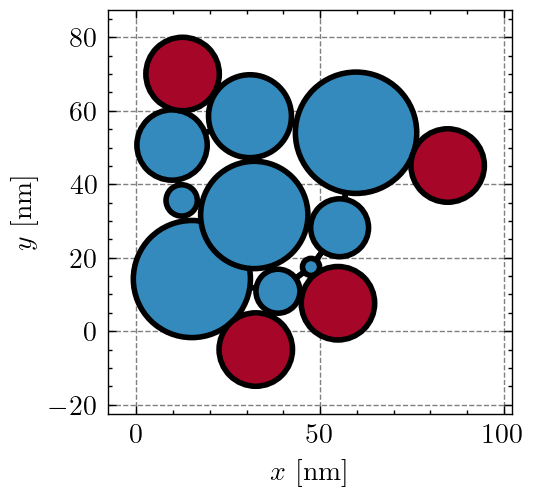

In [20]:
fig, ax = plt.subplots(dpi=200)
ax.set_aspect('equal')
for u,v in G.edges():
    x0,y0 = pos[u]; x1,y1 = pos[v]
    ax.plot([x0,x1],[y0,y1], 'black', lw=2)

# Draw nanoparticle circles
for i in range(lattice.N_particles):
    x, y = pos[i]
    circle = plt.Circle((x, y), lattice.radius_vals[i], fill=True,
                        edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.blue_color)
    ax.add_patch(circle)

# Draw electrodes and their connections
for i in range(lattice.N_particles):
    e = lattice.net_topology[i, 0]
    if e != lattice.NO_CONNECTION:
        enode = -int(e)
        x, y = pos[enode]
        # Draw electrode circle
        circ = plt.Circle((x, y), lattice.ELECTRODE_RADIUS, fill=True,
                          edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.red_color)
        ax.add_patch(circ)

# Autoscale
xs = [p[0] for p in pos.values()]
ys = [p[1] for p in pos.values()]
pad = max(np.max(lattice.radius_vals), lattice.ELECTRODE_RADIUS) + 1
ax.set_xlim(min(xs) - pad, max(xs) + pad)
ax.set_ylim(min(ys) - pad, max(ys) + pad)
ax.set_xlabel("$x$ [nm]")
ax.set_ylabel("$y$ [nm]")

In [21]:
lattice.calc_capacitance_matrix(eps_r=eps_r, eps_s=eps_s)
c_mat = lattice.return_capacitance_matrix()
print("Capacitance Matrix:\n", np.round(c_mat,2))

Capacitance Matrix:
 [[  nan -1.87 -0.34 -1.45   nan -0.93 -1.41 -1.23 -1.39]
 [-1.87 13.47 -0.43 -0.21 -2.03 -0.63 -0.35 -0.42 -0.63]
 [-0.34 -0.43   nan -0.07 -0.55 -0.48 -0.13 -0.17 -0.3 ]
 [-1.45 -0.21 -0.07  8.38 -1.43 -0.23 -1.17 -0.5  -0.41]
 [  nan -2.03 -0.55 -1.43   nan -2.65 -1.85 -3.45 -2.88]
 [-0.93 -0.63 -0.48 -0.23 -2.65 15.18 -0.44 -0.71 -2.36]
 [-1.41 -0.35 -0.13 -1.17 -1.85 -0.44   nan -2.28 -0.98]
 [-1.23 -0.42 -0.17 -0.5  -3.45 -0.71 -2.28 22.28 -3.38]
 [-1.39 -0.63 -0.3  -0.41 -2.88 -2.36 -0.98 -3.38   nan]]


In [22]:
lattice.calc_electrode_capacitance_matrix()
c_e_mat = lattice.return_electrode_capacitance_matrix()
print("Electrode Capacitance Matrix:\n", np.round(c_e_mat,2))

Electrode Capacitance Matrix:
 [[ nan 1.78 0.26 0.28 1.34 0.6  0.47 0.53 0.77]
 [1.31 1.97  nan 0.25 1.57 1.61 0.46 0.6  1.13]
 [0.88 0.27 0.11 0.37 1.08 0.39  nan 3.49 1.04]
 [0.62 0.31 0.15 0.17 0.82 0.73 0.37 0.61  nan]]


In [23]:
voltage_values = [0.1,0.2,-0.5,0,0]
lattice.init_charge_vector(voltage_values)
q_vec = lattice.return_charge_vector()
print("Initial Charge Vector:\n", np.round(q_vec,2))

Initial Charge Vector:
 [  nan  0.43   nan -0.11 -0.09  0.19   nan -1.57   nan]


In [24]:
len(np.unique([10,10,10])) > 1

False